# Project: Investigate a Dataset - [TMDB-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> For this project, I will investigate for TMDB dataset, the data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.  


### Question(s) for Analysis
>**Q1**: Which Movie Gener Has The Most Revenue?

> **Q2**: Which Movie Title Has More popularity and vote_average 

In [41]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline



In [42]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade numpy==1.23.4 --user

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [44]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [45]:
df.shape

(10866, 21)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [47]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [48]:
#for the objects value
df.describe(include = ['O'])

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10856,10866,10790,2936,10822,8042,9373,10862,10843,9836,10866
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt0411951,Hamlet,Louis C.K.,http://www.thehungergames.movie/,Woody Allen,Based on a true story.,woman director,No overview found.,Comedy,Paramount Pictures,1/1/09
freq,2,4,6,4,45,5,134,13,712,156,28


In [49]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [50]:
df.duplicated().sum()

1


### Data Cleaning

> I noticed that from the previous section that there's a null value, and duplicate value and the important thing that this dataset contain a lot of columns that we don't need for farther operations.
what todo:
remove null values
remove duplicates
remove columns for readability
fixing the data type

In [51]:
# here in this cell I will handle the null values by removing columns with nulls
df.dropna(inplace=True)

In [52]:
# check if there's still any null values, It should print false
df.isnull().sum().any()

False

In [53]:
# remvoving the duplicate values
df.drop_duplicates(inplace= True)

In [54]:
# check if there's still any duplicate values, It should print 0
df.duplicated().sum()

0

In [55]:
# remove columns for readability
df.drop(['imdb_id','homepage','tagline','keywords','overview','cast','production_companies'], axis=1, inplace=True)

In [56]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [57]:
#replace the release_date columns from unclear datetype to a better one for readability 
df['release_date'] = pd.to_datetime(df['release_date'])

In [58]:
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which Movie Gener Has The Most Revenue!)

In [59]:
def BarPlot(Size,y_axis,x_axis,title,xlabel,ylabel,font_size):
    plt.subplots(figsize=(Size[0], Size[1]))
    plt.barh(y_axis, x_axis)
    plt.title(title,fontsize=font_size)
    plt.xlabel(xlabel,fontsize=font_size)
    plt.ylabel(ylabel,fontsize=font_size);
    plt.tight_layout()
    plt.show()

In [60]:
# Here I will find the geners that grouped by revenue's to see which one have the most revenue
# I discovered that the genres are separated by | which would need a change by separating the genres from each other
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
genres_revenue = df.groupby(['genres'])['revenue'].mean()

genres_revenue.index

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object', name='genres')

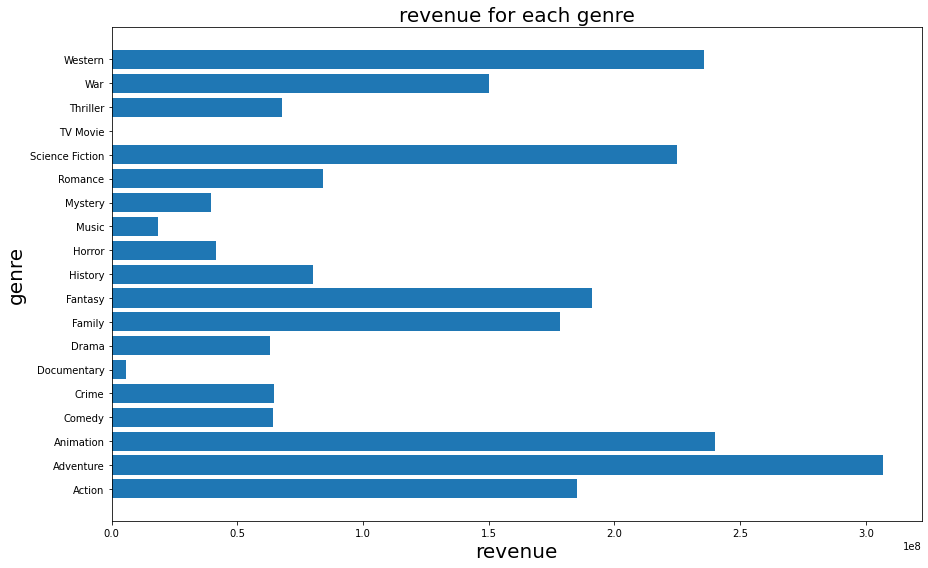

In [61]:
#BarPlot(list of 2 int for the Bar size,y_axis,x_axis,titleis string,ylabel is string,xlabel in string, font size as int))
BarPlot([13,8],genres_revenue.index,genres_revenue,'revenue for each genre','revenue','genre',20)

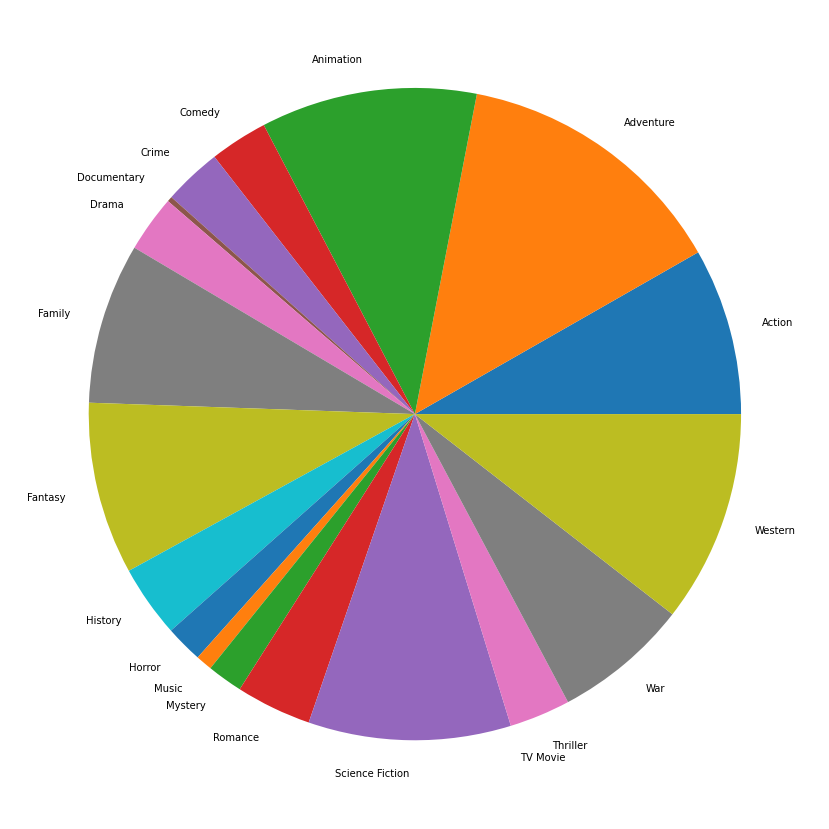

In [62]:
fig = plt.figure(figsize =(30, 15))
plt.pie(genres_revenue, labels = genres_revenue.index)
plt.show()

**As we noticed here the Adventure gener has the most revenue between all the geners**

### Research Question 2  (Which Movie Title Has More popularity and vote_average !)
> The data set has more than 1900 different movies the best solution is to find the top 10 of popularity and vote average individually then append them, after that I did sort each one of them based on the popularity or vote average then use these data to find the top 20 for the highest  popularity and vote average for each movie title.

In [63]:
Mtitle_popularityAndVoteAVG=df.groupby(['original_title'])['popularity','vote_average'].mean()
temp1=Mtitle_popularityAndVoteAVG.nlargest(10,'popularity')
temp2=Mtitle_popularityAndVoteAVG.nlargest(10,'vote_average')
final_Data=temp1.append(temp2)
final_Data.sort_values(['popularity','vote_average'],ascending = [False,False])

C:\Users\User\AppData\Local\Temp\ipykernel_1792\1032220889.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Mtitle_popularityAndVoteAVG=df.groupby(['original_title'])['popularity','vote_average'].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_1792\1032220889.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_Data=temp1.append(temp2)


,popularity,vote_average
original_title,,
Jurassic World,32.985763,6.5
Mad Max: Fury Road,28.419936,7.1
Interstellar,24.949134,8.0
Guardians of the Galaxy,14.311205,7.9
Insurgent,13.112507,6.3
Captain America: The Winter Soldier,12.971027,7.6
Star Wars,12.037933,7.9
John Wick,11.422751,7.0
Star Wars: The Force Awakens,11.173104,7.5


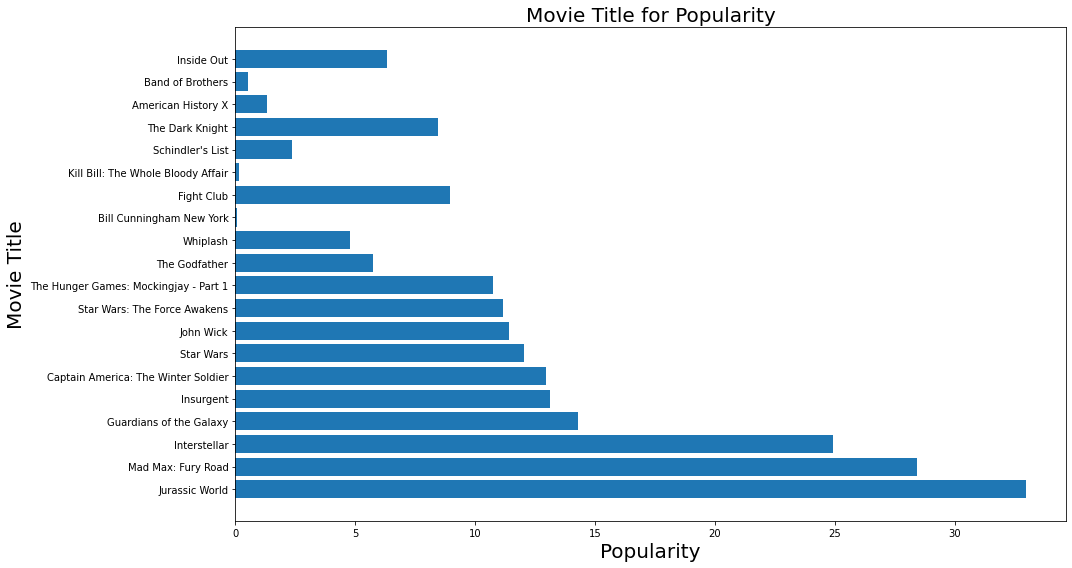

In [64]:
BarPlot([15,8],final_Data.index,final_Data.popularity,'Movie Title for Popularity','Popularity','Movie Title',20)

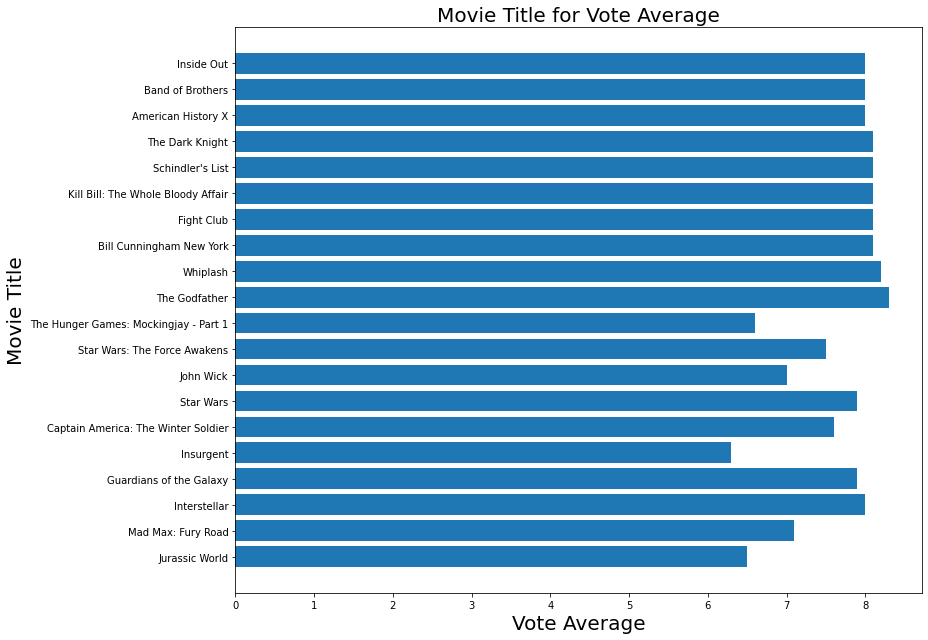

In [65]:
BarPlot([13,9],final_Data.index,final_Data.vote_average,'Movie Title for Vote Average','Vote Average','Movie Title',20)

<a id='conclusions'></a>
## Conclusions

> For this project I learned interesting facts about movies like the most movie genres that would have the highest revenue which is the adventure of the most popular movie which was the jurassic world or the most average vote which was the God father, I also learnd the most important criteria for movie rating by this dataset. 

> There are couple limitation in our data, the data has been gathered isn't up to date because it contains movies only since 2015 , and one of the major issues with this dataset it contains a lot of zeros which might affect on diffrent statistical opreations.



In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1